# *customer segmentation using description column*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

viewing the dataset

In [ ]:
df = pd.read_csv('/content/data.csv',encoding='cp1252')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


dropping unnecessary columns 

In [ ]:
df = df.drop(['StockCode','InvoiceNo'],axis=1)

In [ ]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


findingout null values

In [ ]:
df.isnull().sum()

Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.Description.nunique()

4223

dropping nan values and duplicates in description column

In [ ]:
df = df.dropna(subset = ['Description'] )

In [ ]:
df = df.drop_duplicates(subset = 'Description')

searching any blank spaces in description

In [ ]:
df['Description'].str.isspace().sum()

0

removing punctuation for nlp

In [ ]:
df['Dscrptn'] = df['Description'].str.replace("[^a-zA-Z0-9]", " ")

<ipython-input-13-69b928c4cbae>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



removing unnecessary stopwords 

In [ ]:
df['Dscrptn'] = df['Dscrptn'].apply(lambda x: ' '.join([word for word in x.split() if len(word)>2]))

changing all words into lowercases

In [ ]:
df['Dscrptn'] = [product.lower() for product in df['Dscrptn']]

In [ ]:
df['Dscrptn'].head(5)

0       white hanging heart light holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4          red woolly hottie white heart
Name: Dscrptn, dtype: object

In [ ]:
df.shape

(4223, 7)

importing nlp packages

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

removing stopwords in description column

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
  
stop_words = stopwords.words('english')

add_words = ['pink','purple','white','blue','large','small','black','silver','metal','love','heart','christmas','set','red','green','vintage','design']

stop_words.extend(add_words)
  
def remove_stopwords(sw):    
    words_tokenized = word_tokenize(sw)
    des_new = " ".join([word for word in words_tokenized  if word not in stop_words])
    return des_new

df['Dscrptn'] = [remove_stopwords(r) for r in df['Dscrptn']]

lemmatization of words in description

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
  wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
  lemmatized_sentence = []
  for word, tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word) 
    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
  return " ".join(lemmatized_sentence)     

df['Dscrptn'] = df['Dscrptn'].apply(lambda x: lemmatize_sentence(x))      

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


visualization

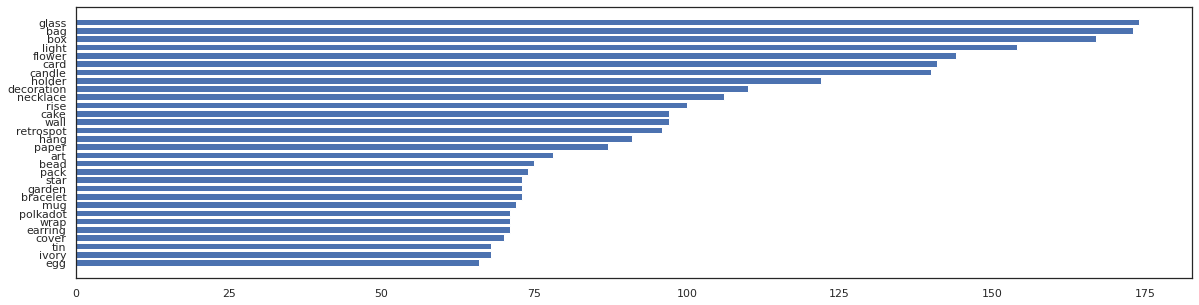

In [ ]:
sns.set(style = 'white')
from nltk import FreqDist   

all_words_df = df['Dscrptn']

all_words = ' '.join([text for text in all_words_df])
all_words = all_words.split()
words_df = FreqDist(all_words)

words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

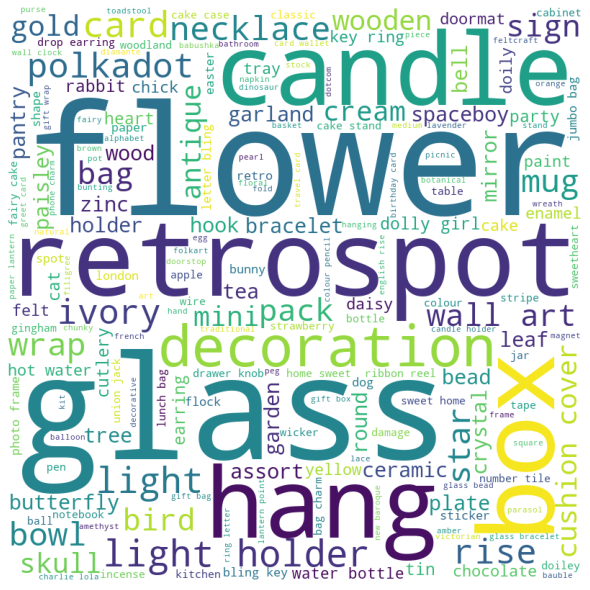

In [ ]:
from wordcloud import WordCloud
word_cloud_df = df['Dscrptn']
all_words = ' '.join([text for text in word_cloud_df])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
dscrptn_tfidf = tfidf.fit_transform(df.Dscrptn)

In [ ]:
words = tfidf.get_feature_names_out()

In [ ]:
dscrptn_tfidf

<4223x1939 sparse matrix of type '<class 'numpy.float64'>'
	with 13959 stored elements in Compressed Sparse Row format>

building kmeans model for clusters in description

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
ssd = []

for k in range(2,31):
    
    model = KMeans(n_clusters=k)
    
    model.fit(dscrptn_tfidf)
    
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

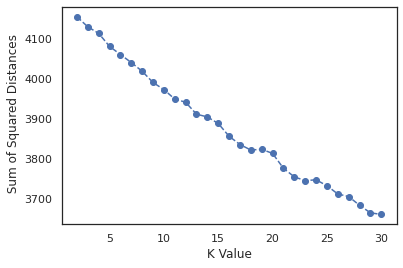

In [ ]:
plt.plot(range(2,31),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [ ]:
pd.Series(ssd).diff()

0           NaN
1    -25.164395
2    -16.372762
3    -32.554613
4    -20.433436
5    -19.979408
6    -21.845537
7    -28.112571
8    -17.770812
9    -23.758353
10    -7.886599
11   -29.921077
12    -6.890245
13   -16.302565
14   -32.108536
15   -20.599786
16   -13.851859
17     1.887042
18   -10.348204
19   -37.248754
20   -21.365680
21    -9.519561
22     2.178110
23   -14.809124
24   -20.724521
25    -6.412775
26   -21.900323
27   -18.854248
28    -3.964063
dtype: float64

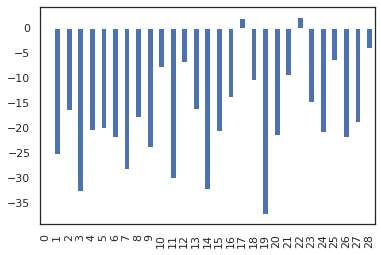

In [ ]:
pd.Series(ssd).diff().plot(kind='bar')

fitting the best k value

In [ ]:
model = KMeans(n_clusters=20, init = 'k-means++', max_iter = 300, n_init = 10)
model.fit(dscrptn_tfidf)

KMeans(n_clusters=20)

In [ ]:
model.labels_

array([11,  1,  1, ...,  1, 11,  9], dtype=int32)

In [ ]:
common_words = model.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : wrap, cake, tin, retrospot, case, fairy, font, stand, biscuit, gift
1 : earring, egg, crystal, frame, mirror, pack, bead, ribbon, rise, ivory
2 : bag, jumbo, lunch, gift, charm, charlotte, paisley, retrospot, party, cosmetic
3 : candle, scent, rise, dinner, holder, pot, box, morris, flock, bird
4 : polkadot, tea, towel, plate, umbrella, time, party, cutlery, cup, fold
5 : assort, frutti, tutti, colour, pen, notebook, suction, box, ring, tag
6 : wall, art, clock, mirror, tidy, diner, organiser, dog, stitch, kitchen
7 : garden, cottage, number, child, magic, tile, decoration, path, thermometer, giant
8 : decoration, hang, tree, star, wooden, bell, easter, chick, zinc, rabbit
9 : paper, lantern, point, doily, honeycomb, star, cup, chain, garland, parasol
10 : sign, french, door, style, chateau, bathroom, toilet, enamel, sing, way
11 : light, holder, hang, star, glass, zinc, night, bird, chandelier, lead
12 : card, birthday, greet, wallet, travel, play, holder, tree, xmas, robin
13 : b

In [ ]:
df['dscrptn Clusters'] = model.labels_

In [ ]:
df['dscrptn Clusters'].nunique()

20

In [ ]:
df['dscrptn Clusters'].value_counts()

1     2002
0      259
17     193
2      169
19     146
11     146
15     142
12     141
13     141
3      136
8      102
6       97
4       96
10      82
9       81
14      79
16      71
7       65
5       50
18      25
Name: dscrptn Clusters, dtype: int64

In [ ]:
df['CustomerID'].shape

(4223,)

In [ ]:
df = df.drop(['Dscrptn'],axis=1)

In [ ]:
df = df.dropna(subset = ['CustomerID'])

In [ ]:
df['CustomerID'].shape

(2888,)

In [ ]:
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,dscrptn Clusters
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,11
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,15
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1
...,...,...,...,...,...,...,...
503602,SET OF 6 RIBBONS PERFECTLY PRETTY,3,11/27/2011 12:29,2.89,15443.0,United Kingdom,1
504104,SET OF 6 RIBBONS PARTY,1,11/27/2011 13:29,2.89,17288.0,United Kingdom,1
527065,"LETTER ""U"" BLING KEY RING",12,12/5/2011 15:48,0.29,13790.0,United Kingdom,18
537621,CREAM HANGING HEART T-LIGHT HOLDER,4,12/8/2011 12:07,2.95,17841.0,United Kingdom,11


In [ ]:
df = df.drop(['Description'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2888 entries, 0 to 540421
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quantity          2888 non-null   int64  
 1   InvoiceDate       2888 non-null   object 
 2   UnitPrice         2888 non-null   float64
 3   CustomerID        2888 non-null   float64
 4   Country           2888 non-null   object 
 5   dscrptn Clusters  2888 non-null   int32  
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 146.7+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [ ]:
new_df = df.groupby('CustomerID').mean()

In [ ]:
new_df

,Quantity,InvoiceDate,UnitPrice,Country,dscrptn Clusters
CustomerID,,,,,
12346,74215.0,31.0,1.040000,18.0,1.000000
12357,12.0,203.0,2.100000,17.0,3.000000
12370,19.0,358.0,2.233333,3.0,13.333333
12377,16.0,489.0,2.950000,17.0,8.000000
12383,100.0,494.0,0.120000,1.0,1.000000
...,...,...,...,...,...
18229,4.0,276.0,3.750000,18.0,1.000000
18239,8.0,471.0,1.650000,18.0,2.000000
18245,12.0,411.0,0.635000,18.0,14.500000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(new_df)

In [ ]:
sd = []

for k in range(2,20):
    
    model = KMeans(n_clusters=k)
    
    model.fit(X)
    
    sd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

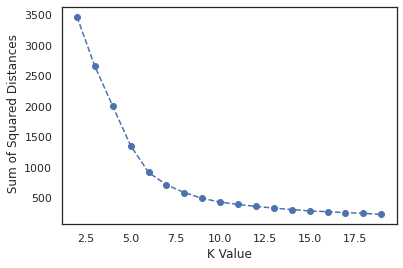

In [ ]:
plt.plot(range(2,20),sd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

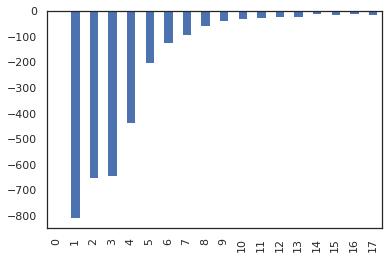

In [ ]:
pd.Series(sd).diff().plot(kind='bar')

In [ ]:
pd.Series(sd).diff()

0            NaN
1    -809.607825
2    -654.957761
3    -646.884656
4    -439.083616
5    -202.640093
6    -127.466876
7     -95.410649
8     -59.876378
9     -39.259767
10    -31.870457
11    -28.034010
12    -23.478217
13    -22.869860
14    -12.013796
15    -14.773871
16    -12.289429
17    -18.014769
dtype: float64

In [ ]:
kmodel = KMeans(n_clusters=5, init = 'k-means++', max_iter = 300, n_init = 10)

In [ ]:
kmodel.fit(X)

KMeans(n_clusters=5)

In [ ]:
new_df['Cus_seg_clusters'] = kmodel.labels_

In [ ]:
new_df.head()

,Quantity,InvoiceDate,UnitPrice,Country,dscrptn Clusters,Cus_seg_clusters
CustomerID,,,,,,
12346,74215.0,31.0,1.040000,18.0,1.000000,3
12357,12.0,203.0,2.100000,17.0,3.000000,2
12370,19.0,358.0,2.233333,3.0,13.333333,0
12377,16.0,489.0,2.950000,17.0,8.000000,1
12383,100.0,494.0,0.120000,1.0,1.000000,0


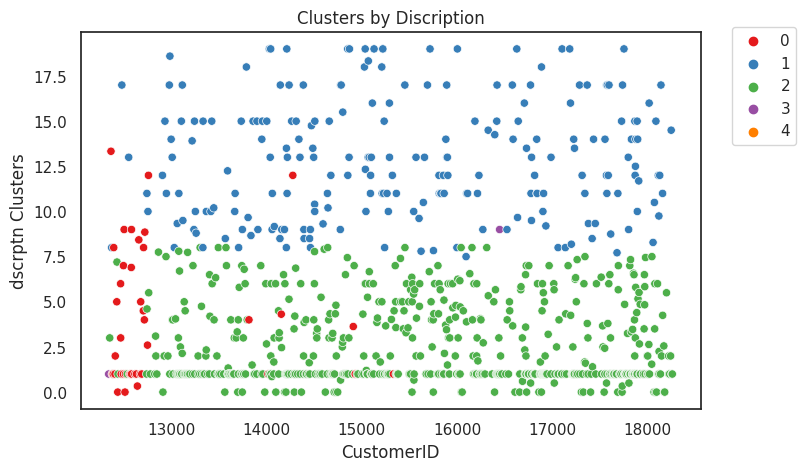

In [ ]:
plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(data=new_df,x='CustomerID',y='dscrptn Clusters',hue='Cus_seg_clusters',palette='Set1');
plt.legend(loc=(1.05,0.7))
plt.title('Clusters by Discription');

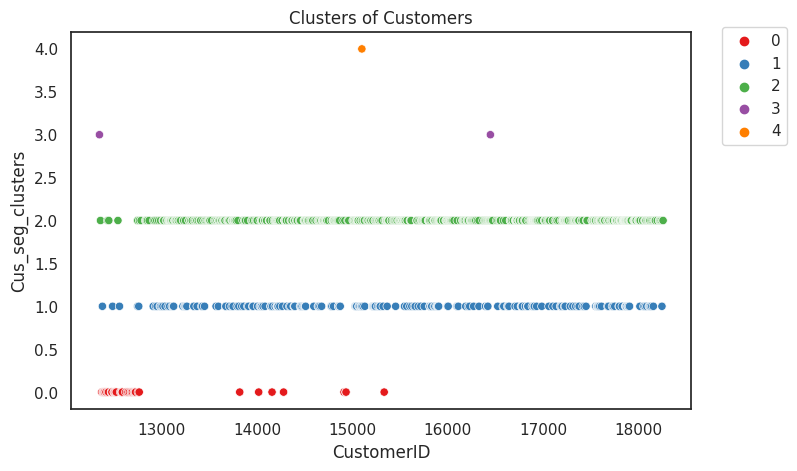

In [ ]:
plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(data=new_df,x='CustomerID',y='Cus_seg_clusters',hue='Cus_seg_clusters',palette='Set1');
plt.legend(loc=(1.05,0.7))
plt.title('Clusters of Customers');

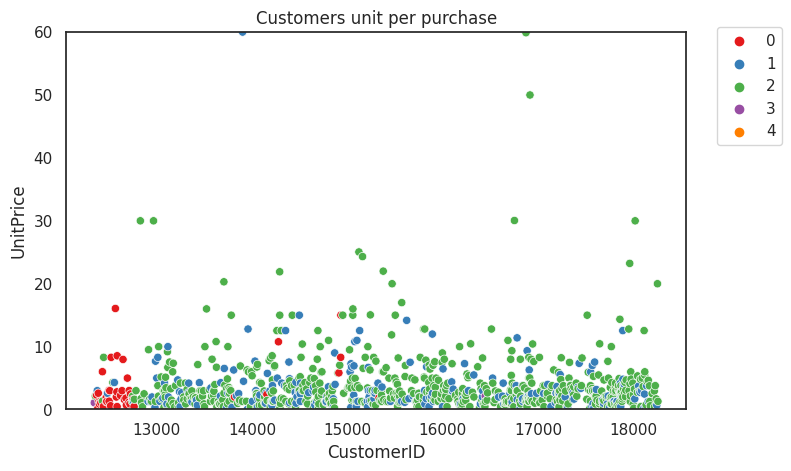

In [ ]:
plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(data=new_df,x='CustomerID',y='UnitPrice',hue='Cus_seg_clusters',palette='Set1');
plt.legend(loc=(1.05,0.7))
plt.ylim(0,60)
plt.title('Customers unit per purchase');

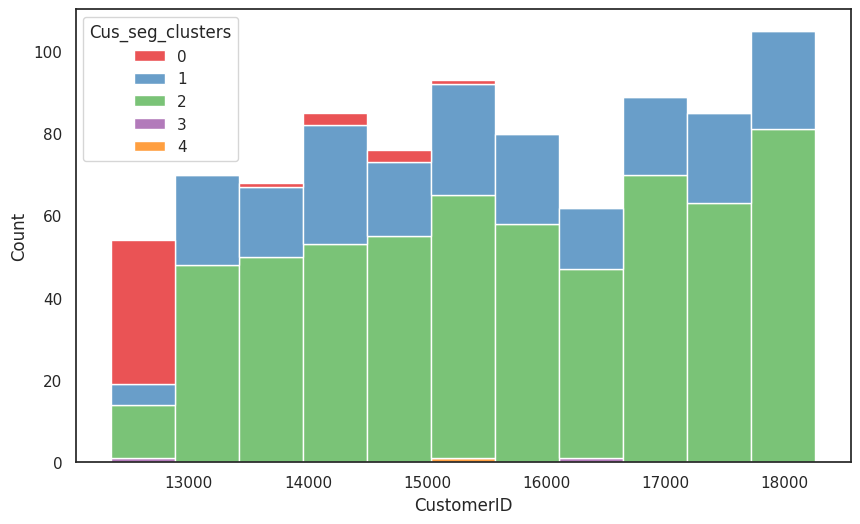

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(data=new_df,x='CustomerID',hue='Cus_seg_clusters',multiple="stack",palette='Set1')

In [ ]:
new_df['Cus_seg_clusters'].value_counts()

2    601
1    220
0     43
3      2
4      1
Name: Cus_seg_clusters, dtype: int64

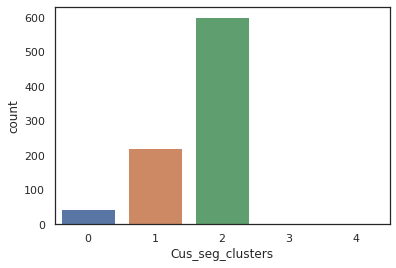

In [ ]:
sns.countplot(x='Cus_seg_clusters',data=new_df)

In [ ]:
Cstmr_seg = new_df.groupby('Cus_seg_clusters').sum()

In [ ]:
Cstmr_seg

,Quantity,InvoiceDate,UnitPrice,Country,dscrptn Clusters
Cus_seg_clusters,,,,,
0,882.346296,24293.498347,207.759923,238.0,164.894511
1,2322.077903,142154.028571,764.293031,3939.0,2821.333450
2,8820.027572,344404.857274,2915.179198,10792.0,1549.238216
3,155210.000000,718.000000,3.120000,36.0,10.000000
4,60.000000,944.000000,649.500000,18.0,1.000000


In [ ]:
Cstmr_segs = new_df.groupby('Cus_seg_clusters').mean()

In [ ]:
Cstmr_segs

,Quantity,InvoiceDate,UnitPrice,Country,dscrptn Clusters
Cus_seg_clusters,,,,,
0,20.519681,564.965078,4.831626,5.534884,3.834756
1,10.554900,646.154675,3.474059,17.904545,12.824243
2,14.675587,573.053007,4.850548,17.956739,2.577767
3,77605.000000,359.000000,1.560000,18.000000,5.000000
4,60.000000,944.000000,649.500000,18.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
minmax = scaler.fit_transform(Cstmr_segs)

In [ ]:
customer_seg = pd.DataFrame(data=minmax,index=Cstmr_segs.index,columns=Cstmr_segs.columns)

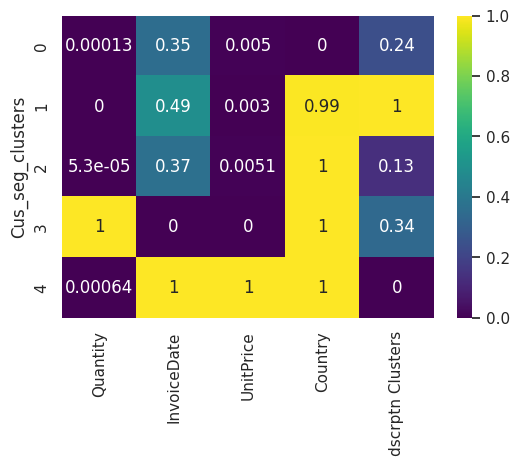

In [ ]:
plt.figure(figsize=(6,4),dpi=100)
sns.heatmap(customer_seg,annot=True,cmap='viridis');

Correlation Between customers


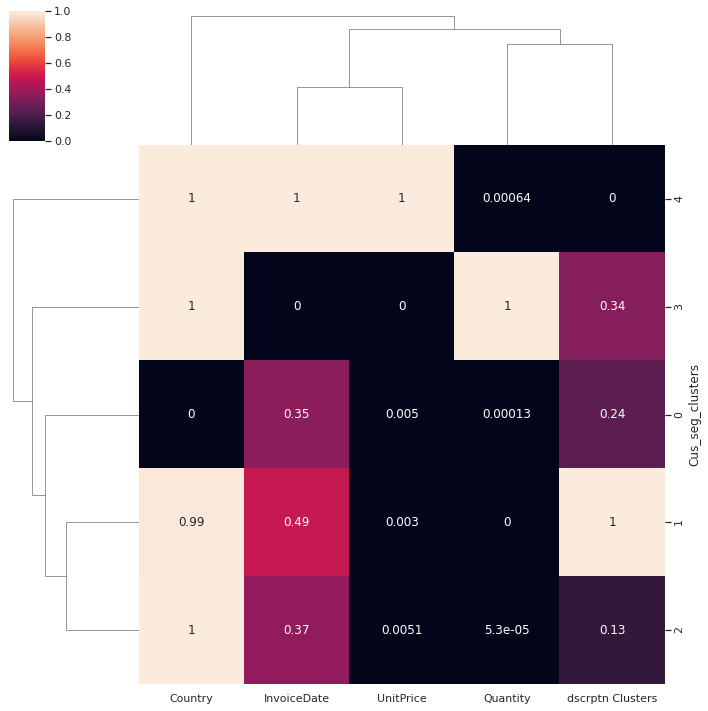

In [ ]:
print('Correlation Between customers')
sns.clustermap(customer_seg,annot=True);